The variables:

Satisfaction: The overall satisfaction level of the customer, having the options "satisfied" or "dissatisfied".

Gender: The gender of the customer, being "male" or "female".

Customer Type: Whether the customer is a "loyal customer" or a "disloyal customer".

Age: The age of the customer.

Type of Travel: The type of travel, such as "Personal Travel" or "Business travel."

Class: The class of travel, such as "Eco" or "Business" or "Eco Plus".

Flight Distance: The distance of the flight.

Seat comfort: Customer rating of seat comfort.

Departure/Arrival time convenient: Customer rating of convenience of departure/arrival times.

Food and drink: Customer rating of food and drink quality.

Gate location: Customer rating of gate location.

Inflight wifi service: Customer rating of inflight Wi-Fi service.

Inflight entertainment: Customer rating of inflight entertainment options.

Online support: Customer rating of online customer support.

Ease of Online booking: Customer rating of ease of online booking.

On-board service: Customer rating of on-board service provided by the airline.

Leg room service: Customer rating of leg room service provided during the flight.

Baggage handling: Customer rating of baggage handling.

Checkin service: Customer rating of check-in service.

Cleanliness: Customer rating of cabin cleanliness.

Online boarding: Customer rating of online boarding process.

Departure Delay in Minutes: The departure delay in minutes for each flight.

Arrival Delay in Minutes: The arrival delay in minutes for each flight.

All rating features are measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, PrecisionRecallDisplay

from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Invistico_Airline.csv")
df.head()

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
df.shape

(129880, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df.isna().sum()

Satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
# there are some missing values for the column 'Arrival Delay in Minutes' which will have to be solved

In [7]:
categorical_features = ['Satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Seat comfort',
                       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
                       'Inflight wifi service', 'Inflight entertainment', 'Online support',
                       'Ease of Online booking', 'On-board service', 'Leg room service',
                       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']

for i in categorical_features:
    print(df[i].value_counts())
    print('--------------------------------------')

satisfied       71087
dissatisfied    58793
Name: Satisfaction, dtype: int64
--------------------------------------
Female    65899
Male      63981
Name: Gender, dtype: int64
--------------------------------------
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
--------------------------------------
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
--------------------------------------
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
--------------------------------------
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat comfort, dtype: int64
--------------------------------------
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: Departure/Arrival time convenient, dtype: int64
--------------------------------------
3    28150
4    27216
2    27146
1    21076
5    20347
0     5945
Name: Food and drink, dtype: int64
----------------

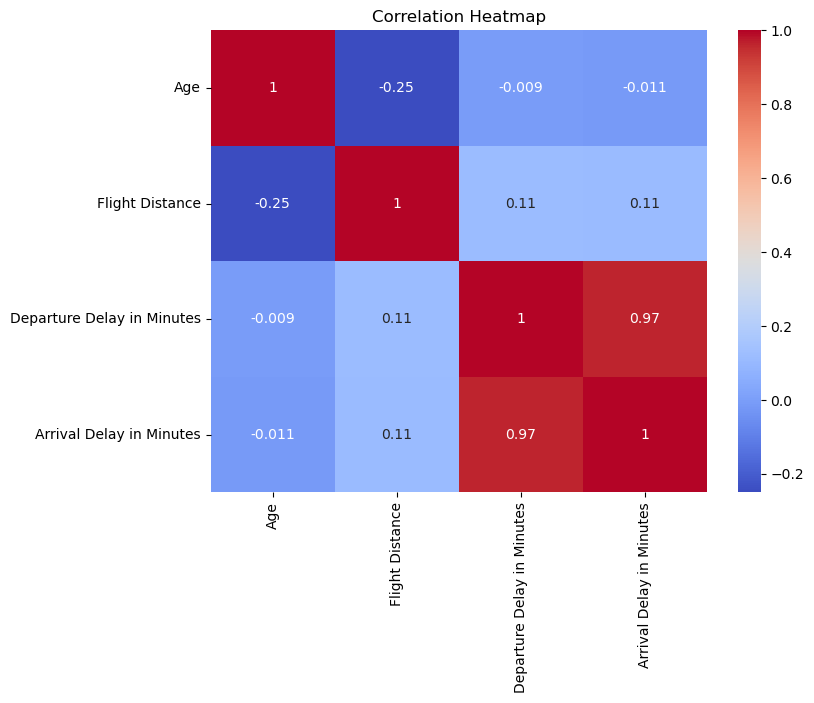

In [8]:
numerical_features = ["Age", "Flight Distance", "Departure Delay in Minutes", 'Arrival Delay in Minutes']


plt.figure(figsize=(8, 6))

# Calculate the correlation matrix for the numerical columns
correlation_matrix = df[numerical_features].corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()



In [9]:
# from this heat map above we realize that the data for 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' is 
# highly correlated and due to the fact that the latter is missing some values, we will choose to drop it
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)

In [10]:
# we split the data into features(X) and target(Y)
X = df.drop("Satisfaction", axis=1)
Y = df["Satisfaction"]

In [11]:
le = LabelEncoder()

categorical_labels = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for col in categorical_labels:
    X[col] = le.fit_transform(X[col])
    
scaler = StandardScaler()

numerical_labels = ["Age", "Flight Distance", "Departure Delay in Minutes"]

X[numerical_labels] = scaler.fit_transform(X[numerical_labels])

X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,0,0,1.691351,1,1,-1.671103,0,0,0,2,...,4,2,3,3,0,3,5,3,2,-0.386481
1,1,0,0.500820,1,0,0.469852,0,0,0,3,...,2,2,3,4,4,4,2,3,2,7.756204
2,0,0,-1.615680,1,1,0.152458,0,0,0,3,...,0,2,2,3,3,4,4,4,2,-0.386481
3,0,0,1.360648,1,1,-1.322552,0,0,0,3,...,4,3,1,1,0,1,4,1,3,-0.386481
4,0,0,2.022054,1,1,-1.584452,0,0,0,3,...,3,4,2,2,0,2,4,2,5,-0.386481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,1,-0.689712,1,1,-0.243799,5,5,5,3,...,5,2,2,3,3,4,4,4,2,-0.386481
129876,1,1,1.559070,1,0,0.102804,2,3,2,4,...,1,1,3,2,3,3,1,2,1,4.183929
129877,1,1,1.955913,1,1,0.329653,3,0,3,3,...,2,2,4,4,3,4,2,3,2,3.684862
129878,1,1,1.757491,1,1,0.456222,3,2,3,2,...,2,2,3,3,2,3,2,1,2,4.682997


In [12]:
# list of models to compare
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

for model in models:
    scores = cross_val_score(model, X_train, Y_train)
    
    print(f"{model.__class__.__name__}: Mean Accuracy = {scores.mean()}")

DecisionTreeClassifier: Mean Accuracy = 0.9356549119731765
RandomForestClassifier: Mean Accuracy = 0.9573452486367092


In [14]:
model_1 = DecisionTreeClassifier()

model_1.fit(X_train, Y_train)

Y_pred_1 = model_1.predict(X_test)

acc_1 = accuracy_score(Y_test, Y_pred_1)
print(f"Accuracy: {acc_1:.5f}")


Accuracy: 0.93848


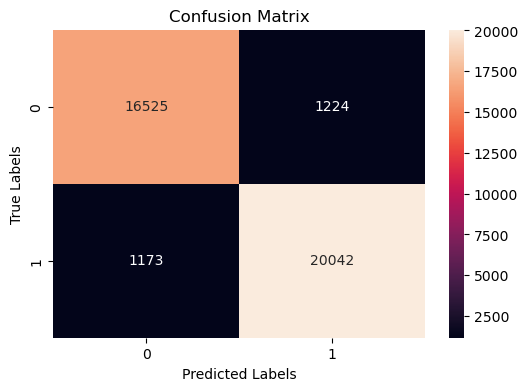

In [15]:
# Create a confusion matrix
conf_matrix_1 = confusion_matrix(Y_test, Y_pred_1)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_1, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

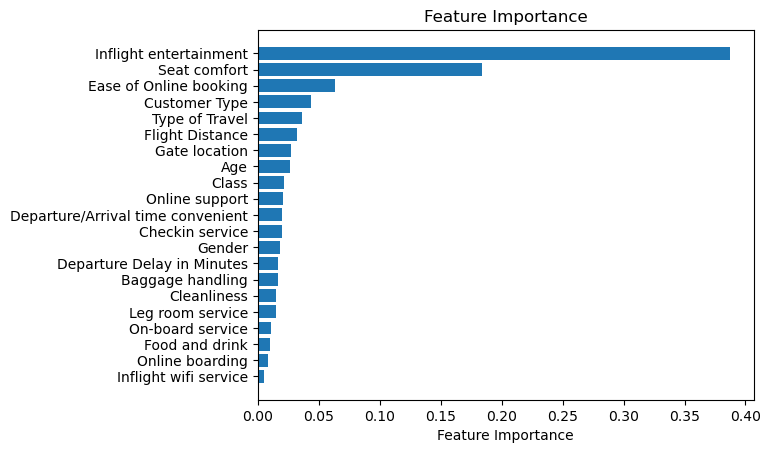

In [16]:
feature_importance_1 = model_1.feature_importances_

features = X.columns

sorted_idx_1 = np.argsort(feature_importance_1)

# Retrieve feature names
features = X.columns

# Plot feature importance
plt.figure()
plt.barh(range(len(feature_importance_1)), feature_importance_1[sorted_idx_1], align='center')
plt.yticks(range(len(features)), features[sorted_idx_1])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

In [17]:
model_2 = RandomForestClassifier()

model_2.fit(X_train, Y_train)

Y_pred_2 = model_2.predict(X_test)

acc_2 = accuracy_score(Y_test, Y_pred_2)
print(f"Accuracy: {acc_2:.5f}")

Accuracy: 0.95696


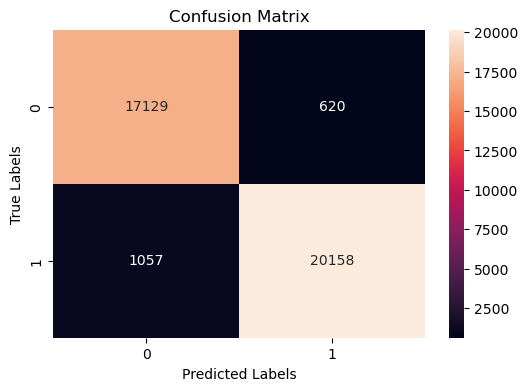

In [18]:
# Create a confusion matrix
conf_matrix_2 = confusion_matrix(Y_test, Y_pred_2)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_2, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

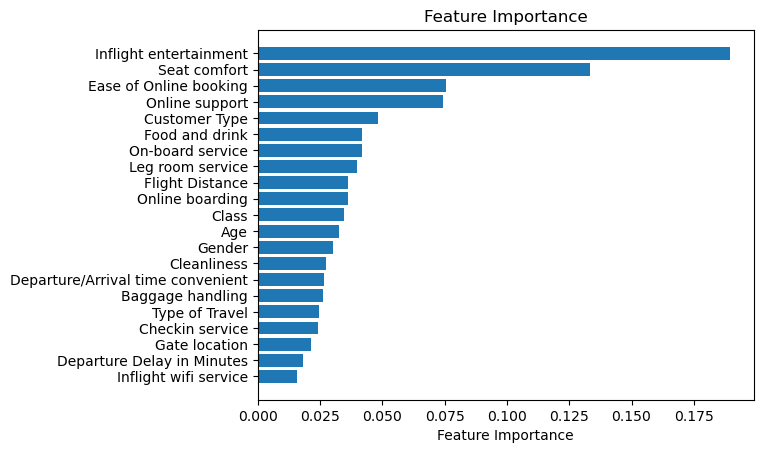

In [20]:
feature_importance_2 = model_2.feature_importances_

features = X.columns

sorted_idx_2 = np.argsort(feature_importance_2)

# Retrieve feature names
features = X.columns

# Plot feature importance
plt.figure()
plt.barh(range(len(feature_importance_2)), feature_importance_2[sorted_idx_2], align='center')
plt.yticks(range(len(features)), features[sorted_idx_2])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()